In [2]:
# baseline approach
# according to the paper: DeepLog: Anomaly Detection and Diagnosis from System Logs
#                                 through Deep Learning
# the baseline approach is not available
# Deeplog approach ----input: only use the timestamp ----- normalize (mean), standard deviation
# output: a real value vector as a prediction for the next parameter
# training stage: mean square loss ---- minimize the error
# anomaly detection: mse loss metrics between prediction ----- gaussian distribution expresses the errors
# how to detect: the error is within a high-level of confidence interval ---- normal. otherwise abnormal

import pandas as pd
from datetime import datetime, timedelta
import re
import numpy as np
import matplotlib.pyplot as plt

# ================= get the hist chart for malicious linux logs ============
fd = pd.read_csv('../data/System_logs/log_value_vector.csv')
parameter_value_vectors = []
# get the parameter_value_vector line
parameter_value_vectors = fd['parameter value vector']
time_gap_lists = []
# copy the orginal data used for analysis
time_gap_lists = parameter_value_vectors.copy()
time_gap_lists = [var.split(',')[0] for var in time_gap_lists]
# transfer the str data into int dtype
replace_pattern = { "[": "", "]": ""}
# define the function to replace multiple values
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text
# replace the '[' and ']' in a string
time_gap_lists = [int(replace_all(var, replace_pattern)) for var in time_gap_lists] 
time_gap_lists

plt.hist(time_gap_lists,bins=100)
plt.xlabel('Time Gap')
plt.ylabel('Occurrence')
plt.title('Normal Linux Time Anomaly Detection')
fd.values

array([['Jun 14 15:16:01 authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.4',
        'authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=<*>',
        "[0, '218.188.2.4']"],
       ['Jun 14 15:16:02 check pass; user unknown',
        'check pass; user unknown', '[1]'],
       ['Jun 14 15:16:02 authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=218.188.2.4',
        'authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=<*>',
        "[0, '218.188.2.4']"],
       ...,
       ['Jul 27 14:42:00 isapnp: No Plug & Play device found',
        'isapnp: No Plug & Play device found', '[0]'],
       ['Jul 27 14:42:00 Real Time Clock Driver v1.12',
        'Real Time Clock Driver v<*>.<*>', "[0, '1', '12']"],
       ['Jul 27 14:42:00 Linux agpgart interface v0.100 (c) Dave Jones',
        'Linux agpgart interface v<*>.<*> (c) Dave Jones',
        "[0, '0', '100']"]], dtype=object)

ValueError: Expected 2D array, got 1D array instead:
array=[0.000000e+00 2.000000e+00 1.000000e+00 0.000000e+00 5.165700e+04
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 3.867000e+03 0.000000e+00 0.000000e+00
 1.000000e+00 0.000000e+00 3.000000e+00 1.000000e+00 3.000000e+00
 1.000000e+00 0.000000e+00 5.000000e+00 1.700000e+02 6.000000e+00
 4.499000e+03 5.624000e+03 1.000000e+00 2.000000e+00 6.000000e+00
 4.000000e+00 0.000000e+00 3.520000e+02 0.000000e+00 4.282000e+03
 1.600000e+02 3.158700e+04 0.000000e+00 0.000000e+00 0.000000e+00
 2.000000e+00 0.000000e+00 2.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 2.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 3.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 2.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 2.000000e+00 7.243500e+04 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 5.815000e+03
 1.000000e+00 3.000000e+00 1.000000e+00 0.000000e+00 1.000000e+00
 3.262000e+03 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 1.092032e+06 5.187290e+05 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+01 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 8.592400e+04 1.000000e+00 1.000000e+00
 6.000000e+00 8.000000e+00 0.000000e+00 3.570000e+02 1.000000e+00
 2.108400e+04 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 4.744400e+04 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 1.721700e+04 1.000000e+00 1.000000e+00 3.400000e+02
 1.000000e+00 1.946000e+04 1.000000e+00 4.000000e+00 1.197000e+04
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

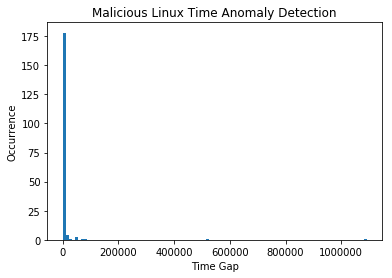

In [23]:
fd_mali = pd.read_csv('../data/System_logs/log_value_vector_mali.csv')
parameter_value_vectors = []
# get the parameter_value_vector line
parameter_value_vectors = fd_mali['parameter value vector']
time_gap_lists = []
# copy the orginal data used for analysis
time_gap_lists = parameter_value_vectors.copy()
time_gap_lists = [var.split(',')[0] for var in time_gap_lists]
# transfer the str data into int dtype
replace_pattern = { "[": "", "]": ""}
# define the function to replace multiple values
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text
# replace the '[' and ']' in a string
time_gap_lists = [int(replace_all(var, replace_pattern)) for var in time_gap_lists] 
time_gap_lists

plt.hist(time_gap_lists,bins=100)
plt.xlabel('Time Gap')
plt.ylabel('Occurrence')
plt.title('Malicious Linux Time Anomaly Detection')

time_gap_lists
x = np.array(time_gap_lists)
x = normalize(x)

the length of log_key_sequence is: 118


{'E12': array(["[1, 'cyrus']", "[1, 'news']", "[1, 'cyrus']", "[1, 'news']",
        "[1, 'cyrus']", "[2, 'news']", "[331, 'test']", "[1, 'cyrus']",
        "[1, 'news']", "[0, 'cyrus']", "[0, 'news']", "[0, 'cyrus']",
        "[1, 'news']", "[1, 'cyrus']", "[1, 'news']", "[1, 'cyrus']",
        "[0, 'news']", "[1, 'cyrus']", "[1, 'news']", "[1, 'cyrus']",
        "[0, 'news']", "[0, 'cyrus']", "[1, 'news']", "[0, 'cyrus']",
        "[2, 'news']", "[1, 'cyrus']", "[1, 'news']", "[1, 'cyrus']",
        "[1, 'news']", "[1, 'cyrus']", "[1, 'news']", "[1, 'cyrus']",
        "[1, 'news']", "[0, 'test']", "[0, 'test']", "[0, 'test']",
        "[0, 'test']", "[1, 'test']", "[0, 'test']", "[0, 'test']",
        "[0, 'test']", "[0, 'test']", "[0, 'test']", "[1, 'cyrus']",
        "[1, 'news']", "[0, 'test']", "[0, 'test']", "[0, 'test']",
        "[0, 'test']", "[0, 'test']", "[1, 'test']", "[0, 'test']",
        "[0, 'test']", "[0, 'test']", "[0, 'test']", "[0, 'test']",
        "[0, 'test']",

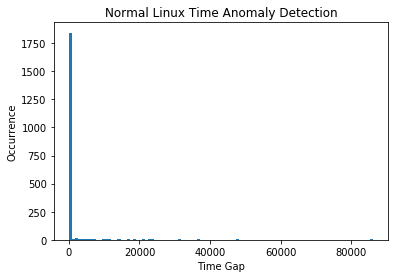

In [24]:
#!/usr/bin/env python
# coding: utf-8


# baseline approach
# according to the paper: DeepLog: Anomaly Detection and Diagnosis from System Logs
#                                 through Deep Learning
# the baseline approach is not available
# Deeplog approach ----input: only use the timestamp ----- normalize (mean), standard deviation
# output: a real value vector as a prediction for the next parameter
# training stage: mean square loss ---- minimize the error
# anomaly detection: mse loss metrics between prediction ----- gaussian distribution expresses the errors
# how to detect: the error is within a high-level of confidence interval ---- normal. otherwise abnormal

# a separate LSTM network is built for the parameter
# value vector sequence of each distinct log key value

import pandas as pd
from datetime import datetime, timedelta
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import re
from keras.preprocessing.text import text_to_word_sequence, Tokenizer
from keras.metrics import mean_squared_error

# ===================== part to visualize to normal logs ======================
fd = pd.read_csv('../data/System_logs/log_value_vector.csv')
parameter_value_vectors = []
# get the parameter_value_vector line
parameter_value_vectors = fd['parameter value vector']
time_gap_lists = []
# copy the orginal data used for analysis
time_gap_lists = parameter_value_vectors.copy()
time_gap_lists = [var.split(',')[0] for var in time_gap_lists]
# transfer the str data into int dtype
replace_pattern = { "[": "", "]": ""}
# define the function to replace multiple values
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text
# replace the '[' and ']' in a string
time_gap_lists = [int(replace_all(var, replace_pattern)) for var in time_gap_lists]

plt.hist(time_gap_lists,bins=100)
plt.xlabel('Time Gap')
plt.ylabel('Occurrence')
plt.title('Normal Linux Time Anomaly Detection')

# ===================== part to visualize to malicious logs ======================
# fd_mali = pd.read_csv('../data/System_logs/log_value_vector_mali.csv')
# parameter_value_vectors = []
# # get the parameter_value_vector line
# parameter_value_vectors = fd_mali['parameter value vector']
# time_gap_lists = []
# # copy the orginal data used for analysis
# time_gap_lists = parameter_value_vectors.copy()
# time_gap_lists = [var.split(',')[0] for var in time_gap_lists]
# # transfer the str data into int dtype
# replace_pattern = { "[": "", "]": ""}
# # define the function to replace multiple values
# def replace_all(text, dic):
#     for i, j in dic.items():
#         text = text.replace(i, j)
#     return text
# # replace the '[' and ']' in a string
# time_gap_lists = [int(replace_all(var, replace_pattern)) for var in time_gap_lists]
# time_gap_lists
#
# plt.hist(time_gap_lists,bins=100)
# plt.xlabel('Time Gap')
# plt.ylabel('Occurrence')
# plt.title('Malicious Linux Time Anomaly Detection')


# build lstm model
# Input: need the normalization and standard deviation
# Output: real value vector as a prediction for next parameter value vector
# optimize the LSTM model ---- mean square loss（MSE）
# Anomaly detection: training set and the validation set
# Judging criteria: if the error is within interval of Gaussian Distribution ---- normal, otherwise abnormal



def key_to_EventId(df):
    log_key_sequence = df['log key']
    log_key_sequence = list(log_key_sequence)
    # get the unique list
    items = set(log_key_sequence)
    # define the total number of log keys
    K = None
    K = len(items)
    print("the length of log_key_sequence is:", len(items))
    key_name_dict = {}

    for i, item in enumerate(items):
        # items is a set
        # columns are the lines of log key sequence
        for j in range(len(log_key_sequence)):
            if log_key_sequence[j] == item:
                name = 'E' + str(i)
                # log_key_sequence[j]='k'+str(i)
                key_name_dict[name] = log_key_sequence[j].strip('\n')

    return log_key_sequence, key_name_dict, K



# ================ build the dict with key:[para1],[para2],.. ===================

key_para_dict = {}

log_key_sequence, key_name_dict, K = key_to_EventId(fd)
fd_id = fd.copy()
# swith the key and value in a dict
key_name_dict_rev = dict((value,key) for key,value in key_name_dict.items())
# mapping the value to keyID
fd_id['log key'] = fd_id['log key'].map(key_name_dict_rev)

uni_log_key_id = list(set(fd_id['log key']))

parameters = []

for i in range(len(uni_log_key_id)):
    # get all the parameters with the same eventID
    parameters = fd_id[fd_id['log key'] == uni_log_key_id[i]]['parameter value vector']
    key_para_dict[uni_log_key_id[i]] = parameters.values[:]
key_para_dict

In [25]:
# ================= get the vocabulary set ==================
text = []
for key, value in key_para_dict.items():
    # extract the time part from values
    for i in range(len(value[:])):
        if value[i].split(',')[1:] == []:
            break
        else:
            value[i] = re.sub('[\[|\]|\'|\|\s+|\.|\-]', '', str(value[i])).split(',')
            if value[i] == ['']:
                break
            else:
                text.append([var for var in value[i][1:]])

# get the text for token_nize
tokens = []
for i in range(len(text)):
    for j in range(len(text[i])):
        tokens.append(text[i][j])
# delete the blank value
tokens = [var for var in tokens if var]
tokens = set(tokens)


# build the dict about different value
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokens)
encoded_texts = tokenizer.texts_to_sequences(tokens)
# build the dict with tokens --> encoded_texts
token_encode_dict = {}
for token, encoded_text in zip(tokens, encoded_texts):
    token_encode_dict[token] = encoded_text

# map the value vector data using the dict
print("the dict is:",token_encode_dict)


# define the function to replace the str into int 
# def map_int(lists, dict_value):
#     for i in range(len(lists)):
#         for key,value in dict_value.items():
#             for j in range(1,len(lists[i])):
#                 print("the lists[i] is:",lists[i],type(lists[i]))
#                 lists[i] = lists[i].split(',')
#                 lists[i][len(lists[i])-1] = re.sub('[[|\]]','',lists[i][len(lists[i])-1])
#             # bypass the first value
#                 lists[i][j] = lists[i][j].replace(key, str(value))
    
#     return lists

# function split the time_lists into x and y
def data_create(time_sequence):
    seq_length = 3
    dataX = []
    dataY = []
    for i in range(0, len(time_gap_lists)-seq_length,1):
        seq_in = time_gap_lists[i:i+seq_length]
        print("the seq_in is:", seq_in)
        seq_out = time_gap_lists[i+seq_length]
        print("the seq_out is:", seq_out)
        dataX.append([var for var in seq_in])
        dataY.append(seq_out)

    return dataX, dataY


# define the lstm model for separate log key
def lstm_parameter_model():
    model = Sequential()
    model.add(LSTM(32, activation='relu', return_sequences=True, input_shape=(x.shape[1], x.shape[2])))

    model.add(LSTM(32, activation='relu', return_sequences=False))
    # output layer with a single value prediction (1,K)

    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(loss="mse", optimizer='adam', metrics=['accuracy'])
    print("the shape of x_train data is:", x.shape)
    print("the shape of y_train data is:", y.shape)
    # to ensure the training data patterns remain sequential --- disable the shuffle
    # make it stateful, we add batch_size
    model.fit(x, y, epochs=500, batch_size=batch_size, verbose=2, callbacks=[callbacks], shuffle=False)
    # to see the summary of input and output shape
    model.summary()
    print('the accuracy for single lstm model is:', model.evaluate(x, y, batch_size=batch_size, verbose=0))


the dict is: {'1122475266': [5], 'SatJun2519': [6], '6219210294dsleasynetnl': [7], 'lnsvlq45tou8225216281adslproxadnet': [8], '38': [9], 'adsl6319798106dslmtry01pacbellnet': [10], '8277200128': [11], '48': [12], 'SunJul1007': [13], 'SunJul323': [14], '2111072321': [15], 'troiblueskytechnologiescom': [16], '502005': [17], '2031014559': [18], '12': [19], 'SatJul912': [20], 'SunJul1709': [21], '358': [22], '2064720910': [23], '22011724187': [24], '2111676859': [25], '57': [26], '0000000007eae000': [27], '126MB': [28], '0xfc0ce': [29], '4294965305': [30], '47': [31], 'd211116254214revkrlinenet': [32], '26': [33], '21146224253': [34], 'WedJun2914': [35], '6516615914': [36], 'h641871131gtconnectnet': [37], '23': [2], '20282200188': [38], '8086': [39], '2000': [40], '132005': [41], '210765929': [42], 'SunJul1723': [43], 'SatJul1608': [44], '582005': [45], '28334': [46], '21022397117': [47], '5': [48], '21011817095': [49], 'test': [50], '04': [51], 'WedJul2710': [52], '2117610465ebixnettw': [5

In [75]:
list_length = []
for var in fd_id['parameter value vector']:
    list_length.append(len(var.split(',')))
max(list_length)
# list_length
list_name = []
for i in range(max(list_length)):
    list_name.append('value'+str(i))
fd_id[list_name] = fd_id['parameter value vector'].str.split(",", expand = True,)
# [var for var in fd_id['value15'] if var]
# fd_id
for name in list_name:
    for var in range(len(fd_id[name])):
        # we should use fd_id[x] to rewrite value in
        if fd_id[name][var]!=None:
            print("we are replacing var:",fd_id[name][var])
            fd_id[name][var] = re.sub("[\[|\]|']|\s+|\.|\-",'',fd_id[name][var])
            print("the replaced var is:",fd_id[name][var])
            
fd_id.to_csv('../data/System_logs/log_value_vector_mul_text_value.csv',index = False)

we are replacing var: [0
the replaced var is: 0
we are replacing var: [1]
the replaced var is: 1
we are replacing var: [0
the replaced var is: 0
we are replacing var: [38937
the replaced var is: 38937
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [7279
the replaced var is: 7279
we are replacing var: [1
the replaced var is: 1
we are replacing var: [1]
the replaced var is: 1
we are replacing var: [382
the replaced var is: 382
we are replacing var: [1
the replaced var is: 1
we are replacing var: [28791]
the replaced var is: 28791
we are replacing var: [0
the replaced var is: 0
we are repl

the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [1
the replaced var is: 1
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [3
the replaced var is: 3
we are replacing var: [31123
the replaced var is: 31123
we are replacing var: [0
the replaced var is: 0
we are replacing var: [2]
the replaced var is: 2
we are replacing var: [5]
the replaced var is: 5
we are replacing var: [7]
the replaced var is: 7
we are replacing var: [0]
the replaced var is: 0
we are replacing var: [331
the replaced var is: 331
we are replacing var: [2
the replaced var is: 2
we are replacing var: [85963
the replaced var is: 85963
we are replacing var: [1
the replaced var is: 1
we are replacing var: [1]
the replaced var is: 1
we are replacing var: [367
the replaced var is: 367
we are replacing var: [1
the replaced var is: 1
we are replacing var: [14200
the replaced var is: 14200
we are replacing var: [2
the

the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [22984
the replaced var is: 22984
we are replacing var: [0
the replaced var is: 0
we are replacing var: [1
the replaced var is: 1
we are replacing var: [2
the replaced var is: 2
we are replacing var: [0
the replaced var is: 0
we are replacing var: [1
the replaced var is: 1
we are replacing var: [2
the replaced var is: 2
we are replacing var: [0
the replaced var is: 0
we are re

the replaced var is: 0
we are replacing var: [1
the replaced var is: 1
we are replacing var: [2
the replaced var is: 2
we are replacing var: [2
the replaced var is: 2
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [5
the replaced var is: 5
we are replacing var: [1
the replaced var is: 1
we are replacing var: [1
the replaced var is: 1
we are replacing var: [0
the replaced var is: 0
we are replacing var: [1
the replaced var is: 1
we are replacing var: [3
the replaced var is: 3
we are replacing var: [2
the replaced var is: 2
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [1783
the replaced var is: 1783
we are replacing var: [0
the replaced var is: 0
we are replacing var: [1
the replaced var is: 1
we are replacing var: [0
the replaced var is: 0
we are repl

the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [73761
the replaced var is: 73761
we are replacing var: [1
the replaced var is: 1
we are replacing var: [1]
the replaced var is: 1
we are replacing var: [383
the replaced var is: 383
we are replacing var: [1
the replaced var is: 1
we are replacing var: [69972]
the replaced var is: 69972
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0]
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0]
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [6]
the replaced var is: 6
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0]
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [6779
the replaced var is: 6779
we are replacing var: [4
the replaced var is: 4
we are replacing var: [1
the replaced var is: 1
we are replacing var: [0
the repl

the replaced var is: 0
we are replacing var: [1]
the replaced var is: 1
we are replacing var: [0]
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var: [0
the replaced var is: 0
we are replacing var:  '218.188.2.4']
the replaced var is: 21818824
we are replacing var:  '218.188.2.4']
the replaced var is: 21818824
we are replacing var:  '220-135-151-1.hinet-ip.hinet.net']
the replaced var is: 2201351511hinetiphinetnet
we are replacing var:  '220-135-151-1.hinet-ip.hinet.net']
the replaced var is: 2201351511hinetiphinetnet
we are replacing var:  '220-135-151-1.hinet-ip.hinet.net']
the replaced var is: 2201351511hinetiphinetnet
we are replacing var:  '220-135-151-1.hinet-ip.hinet.net']
the replaced var is: 2201351511hinetiphinetnet
we are replacing var:  '220-135-151-1.hinet-ip.hinet.net']
the replaced var is: 2201351511hinetiphinetnet
we are replacing var:  '220-135-151-1.hinet-ip.hinet.net']
the replaced var is: 2201351511hinetiphinetnet
we are repl

we are replacing var:  '61.74.96.178'
the replaced var is: 617496178
we are replacing var:  '61.74.96.178'
the replaced var is: 617496178
we are replacing var:  '61.74.96.178'
the replaced var is: 617496178
we are replacing var:  '61.74.96.178'
the replaced var is: 617496178
we are replacing var:  '61.74.96.178'
the replaced var is: 617496178
we are replacing var:  '61.74.96.178'
the replaced var is: 617496178
we are replacing var:  '61.74.96.178'
the replaced var is: 617496178
we are replacing var:  '61.74.96.178'
the replaced var is: 617496178
we are replacing var:  '61.74.96.178'
the replaced var is: 617496178
we are replacing var:  '61.74.96.178'
the replaced var is: 617496178
we are replacing var:  '61.74.96.178'
the replaced var is: 617496178
we are replacing var:  '61.74.96.178'
the replaced var is: 617496178
we are replacing var:  '61.74.96.178'
the replaced var is: 617496178
we are replacing var:  '61.74.96.178'
the replaced var is: 617496178
we are replacing var:  '61.74.96.1

we are replacing var:  '211.72.151.162'
the replaced var is: 21172151162
we are replacing var:  '211.72.151.162'
the replaced var is: 21172151162
we are replacing var:  '211.72.151.162'
the replaced var is: 21172151162
we are replacing var:  '211.72.151.162'
the replaced var is: 21172151162
we are replacing var:  '211.72.151.162'
the replaced var is: 21172151162
we are replacing var:  '211.72.151.162'
the replaced var is: 21172151162
we are replacing var:  '211.72.151.162'
the replaced var is: 21172151162
we are replacing var:  '211.72.151.162'
the replaced var is: 21172151162
we are replacing var:  '211.72.151.162'
the replaced var is: 21172151162
we are replacing var:  '211.72.151.162'
the replaced var is: 21172151162
we are replacing var:  '211.72.151.162'
the replaced var is: 21172151162
we are replacing var:  '211.72.151.162'
the replaced var is: 21172151162
we are replacing var:  '211.72.151.162'
the replaced var is: 21172151162
we are replacing var:  '211.72.151.162'
the replace

we are replacing var:  'cyrus']
the replaced var is: cyrus
we are replacing var:  'news'
the replaced var is: news
we are replacing var:  'news']
the replaced var is: news
we are replacing var:  '202-132-40-29.adsl.ttn.net']
the replaced var is: 2021324029adslttnnet
we are replacing var:  '202-132-40-29.adsl.ttn.net']
the replaced var is: 2021324029adslttnnet
we are replacing var:  '202-132-40-29.adsl.ttn.net']
the replaced var is: 2021324029adslttnnet
we are replacing var:  '202-132-40-29.adsl.ttn.net']
the replaced var is: 2021324029adslttnnet
we are replacing var:  '202-132-40-29.adsl.ttn.net']
the replaced var is: 2021324029adslttnnet
we are replacing var:  '202-132-40-29.adsl.ttn.net']
the replaced var is: 2021324029adslttnnet
we are replacing var:  '202-132-40-29.adsl.ttn.net']
the replaced var is: 2021324029adslttnnet
we are replacing var:  '202-132-40-29.adsl.ttn.net']
the replaced var is: 2021324029adslttnnet
we are replacing var:  'c51471f2c.cable.wanadoo.nl']
the replaced va

the replaced var is: 21142188206
we are replacing var:  '211.42.188.206'
the replaced var is: 21142188206
we are replacing var:  '211.42.188.206'
the replaced var is: 21142188206
we are replacing var:  '211.42.188.206'
the replaced var is: 21142188206
we are replacing var:  '211.42.188.206'
the replaced var is: 21142188206
we are replacing var:  '211.42.188.206'
the replaced var is: 21142188206
we are replacing var:  '211.42.188.206'
the replaced var is: 21142188206
we are replacing var:  '211.42.188.206'
the replaced var is: 21142188206
we are replacing var:  '211.42.188.206'
the replaced var is: 21142188206
we are replacing var:  '211.42.188.206'
the replaced var is: 21142188206
we are replacing var:  '211.42.188.206'
the replaced var is: 21142188206
we are replacing var:  '211.42.188.206'
the replaced var is: 21142188206
we are replacing var:  '211.42.188.206'
the replaced var is: 21142188206
we are replacing var:  '211.42.188.206'
the replaced var is: 21142188206
we are replacing v

we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0']
the replaced var is: 0
we are replacing var:  '0']
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 

the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'


we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0']
the replaced var is: 0
we are replacing var:  '0']
the replaced var is: 0
we are replacing var:  '0']
the replaced var is: 0
we are replacing var:  '0']
the replaced var is: 0
we are replacing var:  '0']
the replaced var is: 0
we are replacing var:  '0']
the replaced var is: 0
we are replacing var:  '0']
the replaced var is: 0
we are replacing var:  '0']
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced var is: 0
we are replacing var:  '0'
the replaced va

we are replacing var:  'Wed Jun 29 10'
the replaced var is: WedJun2910
we are replacing var:  'Wed Jun 29 10'
the replaced var is: WedJun2910
we are replacing var:  'Wed Jun 29 10'
the replaced var is: WedJun2910
we are replacing var:  'Wed Jun 29 10'
the replaced var is: WedJun2910
we are replacing var:  'Wed Jun 29 10'
the replaced var is: WedJun2910
we are replacing var:  'Wed Jun 29 10'
the replaced var is: WedJun2910
we are replacing var:  'Wed Jun 29 10'
the replaced var is: WedJun2910
we are replacing var:  'Wed Jun 29 10'
the replaced var is: WedJun2910
we are replacing var:  'Wed Jun 29 10'
the replaced var is: WedJun2910
we are replacing var:  'Wed Jun 29 10'
the replaced var is: WedJun2910
we are replacing var:  'Wed Jun 29 10'
the replaced var is: WedJun2910
we are replacing var:  'Wed Jun 29 14'
the replaced var is: WedJun2914
we are replacing var:  'Wed Jun 29 14'
the replaced var is: WedJun2914
we are replacing var:  'Wed Jun 29 14'
the replaced var is: WedJun2914
we are

the replaced var is: SatJul1608
we are replacing var:  'Sat Jul 16 08'
the replaced var is: SatJul1608
we are replacing var:  'Sat Jul 16 08'
the replaced var is: SatJul1608
we are replacing var:  'Sun Jul 17 04'
the replaced var is: SunJul1704
we are replacing var:  'Sun Jul 17 04'
the replaced var is: SunJul1704
we are replacing var:  'Sun Jul 17 06'
the replaced var is: SunJul1706
we are replacing var:  'Sun Jul 17 06'
the replaced var is: SunJul1706
we are replacing var:  'Sun Jul 17 06'
the replaced var is: SunJul1706
we are replacing var:  'Sun Jul 17 06'
the replaced var is: SunJul1706
we are replacing var:  'Sun Jul 17 06'
the replaced var is: SunJul1706
we are replacing var:  'Sun Jul 17 06'
the replaced var is: SunJul1706
we are replacing var:  'Sun Jul 17 06'
the replaced var is: SunJul1706
we are replacing var:  'Sun Jul 17 06'
the replaced var is: SunJul1706
we are replacing var:  'Sun Jul 17 06'
the replaced var is: SunJul1706
we are replacing var:  'Sun Jul 17 06'
the re

we are replacing var:  '07'
the replaced var is: 07
we are replacing var:  '07'
the replaced var is: 07
we are replacing var:  '07'
the replaced var is: 07
we are replacing var:  '07'
the replaced var is: 07
we are replacing var:  '07'
the replaced var is: 07
we are replacing var:  '07'
the replaced var is: 07
we are replacing var:  '07'
the replaced var is: 07
we are replacing var:  '07'
the replaced var is: 07
we are replacing var:  '55'
the replaced var is: 55
we are replacing var:  '55'
the replaced var is: 55
we are replacing var:  '55'
the replaced var is: 55
we are replacing var:  '55'
the replaced var is: 55
we are replacing var:  '55'
the replaced var is: 55
we are replacing var:  '55'
the replaced var is: 55
we are replacing var:  '55'
the replaced var is: 55
we are replacing var:  '08'
the replaced var is: 08
we are replacing var:  '08'
the replaced var is: 08
we are replacing var:  '08'
the replaced var is: 08
we are replacing var:  '08'
the replaced var is: 08
we are repla

the replaced var is: 59
we are replacing var:  '59'
the replaced var is: 59
we are replacing var:  '59'
the replaced var is: 59
we are replacing var:  '59'
the replaced var is: 59
we are replacing var:  '59'
the replaced var is: 59
we are replacing var:  '59'
the replaced var is: 59
we are replacing var:  '59'
the replaced var is: 59
we are replacing var:  '59'
the replaced var is: 59
we are replacing var:  '59'
the replaced var is: 59
we are replacing var:  '59'
the replaced var is: 59
we are replacing var:  '59'
the replaced var is: 59
we are replacing var:  '59'
the replaced var is: 59
we are replacing var:  '59'
the replaced var is: 59
we are replacing var:  '59'
the replaced var is: 59
we are replacing var:  '59'
the replaced var is: 59
we are replacing var:  '59'
the replaced var is: 59
we are replacing var:  '53'
the replaced var is: 53
we are replacing var:  '53'
the replaced var is: 53
we are replacing var:  '53'
the replaced var is: 53
we are replacing var:  '53'
the replaced

the replaced var is: 04
we are replacing var:  '04'
the replaced var is: 04
we are replacing var:  '04'
the replaced var is: 04
we are replacing var:  '04'
the replaced var is: 04
we are replacing var:  '04'
the replaced var is: 04
we are replacing var:  '04'
the replaced var is: 04
we are replacing var:  '04'
the replaced var is: 04
we are replacing var:  '04'
the replaced var is: 04
we are replacing var:  '04'
the replaced var is: 04
we are replacing var:  '04'
the replaced var is: 04
we are replacing var:  '04'
the replaced var is: 04
we are replacing var:  '04'
the replaced var is: 04
we are replacing var:  '04'
the replaced var is: 04
we are replacing var:  '04'
the replaced var is: 04
we are replacing var:  '04'
the replaced var is: 04
we are replacing var:  '27'
the replaced var is: 27
we are replacing var:  '27'
the replaced var is: 27
we are replacing var:  '27'
the replaced var is: 27
we are replacing var:  '27'
the replaced var is: 27
we are replacing var:  '27'
the replaced

the replaced var is: 092005
we are replacing var:  '09 2005']
the replaced var is: 092005
we are replacing var:  '09 2005']
the replaced var is: 092005
we are replacing var:  '09 2005']
the replaced var is: 092005
we are replacing var:  '09 2005']
the replaced var is: 092005
we are replacing var:  '09 2005']
the replaced var is: 092005
we are replacing var:  '09 2005']
the replaced var is: 092005
we are replacing var:  '09 2005']
the replaced var is: 092005
we are replacing var:  '44 2005']
the replaced var is: 442005
we are replacing var:  '44 2005']
the replaced var is: 442005
we are replacing var:  '44 2005']
the replaced var is: 442005
we are replacing var:  '44 2005']
the replaced var is: 442005
we are replacing var:  '44 2005']
the replaced var is: 442005
we are replacing var:  '44 2005']
the replaced var is: 442005
we are replacing var:  '44 2005']
the replaced var is: 442005
we are replacing var:  '44 2005']
the replaced var is: 442005
we are replacing var:  '44 2005']
the repl

the replaced var is: 572005
we are replacing var:  '57 2005']
the replaced var is: 572005
we are replacing var:  '58 2005']
the replaced var is: 582005
we are replacing var:  '58 2005']
the replaced var is: 582005
we are replacing var:  '58 2005']
the replaced var is: 582005
we are replacing var:  '59 2005']
the replaced var is: 592005
we are replacing var:  '59 2005']
the replaced var is: 592005
we are replacing var:  '59 2005']
the replaced var is: 592005
we are replacing var:  '00 2005']
the replaced var is: 002005
we are replacing var:  '04 2005']
the replaced var is: 042005
we are replacing var:  '39 2005']
the replaced var is: 392005
we are replacing var:  '43 2005']
the replaced var is: 432005
we are replacing var:  '43 2005']
the replaced var is: 432005
we are replacing var:  '44 2005']
the replaced var is: 442005
we are replacing var:  '47 2005']
the replaced var is: 472005
we are replacing var:  '48 2005']
the replaced var is: 482005
we are replacing var:  '49 2005']
the repl

we are replacing var:  '3'
the replaced var is: 3
we are replacing var:  '3-7'
the replaced var is: 37
we are replacing var:  '1'
the replaced var is: 1
we are replacing var:  'Sat May 8 09'
the replaced var is: SatMay809
we are replacing var:  '04'
the replaced var is: 04
we are replacing var:  '50'
the replaced var is: 50
we are replacing var:  '2004']
the replaced var is: 2004


In [65]:
fd_value = pd.read_csv('../data/System_logs/log_value_vector_value.csv', delimiter=',', skipinitialspace=True)
for var in range(1,len(list_name)):
    fd_value[list_name[var]] = fd_value[list_name[var]].map(token_encode_dict)
fd_value.to_csv('../data/System_logs/log_value_vector_multi_value.csv',index = False)

In [ ]:
# fd_multi_value = pd.read_csv('../data/System_logs/log_value_vector_multi_value.csv',delimiter=',', skipinitialspace=True)

In [74]:
# ================== the part to integrate the columns into one column ==================
# ------ first step to execute --------
# fd_multi_value['ColumnX'] = fd_multi_value[fd_value.columns[3:19]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
# fd_multi_value = fd_multi_value.drop(['parameter value vector'], axis=1)
# fd_multi_value = fd_multi_value.drop(list_name, axis=1)
# fd_value
# -------- second step to execute --------------
# fd_multi_value['parameter value vector'] = fd_multi_value['ColumnX']
# fd_multi_value = fd_multi_value.drop(['ColumnX'], axis=1)
# -------- third step to execute
fd_multi_value.to_csv('../data/System_logs/log_value_vector_value.csv',index = False)

In [59]:
# get all the parameter value vector for every unique key log
fd_values = pd.read_csv('../data/System_logs/log_value_vector_value.csv')
uni_log_key_id = list(set(fd_values['log key']))

parameters = []
key_para_dict = {}

for i in range(len(uni_log_key_id)):
    # get all the parameters with the same eventID
    parameters = fd_values[ fd_values['log key'] == uni_log_key_id[i]]['parameter value vector']
    
    key_para_dict[uni_log_key_id[i]] = parameters.values[:]
# plt.hist(key_para_dict['E88'], bins=15)
# plt.ylable('Counter')
# plt.xlabel('Variables')
# plt.title('Single Log Key Vectors')


In [82]:
# define the module to transform str into matrix
# the string is like: '10635,[21, 85, 16, 18],[21, 85, 16, 18, 307, 308, 1],[356],[424],[207]'
def str_array(dict, eventID):
    lists = dict[eventID]
    list_string = []
    pattern = '\d+'
    numx = len(lists)
    numy = len(re.findall(pattern, lists[0]))
    list_array = np.empty(shape=[0, numy])
    for string in lists: 
        list_string = re.findall(pattern, string)
        list_string = [int(var) for var in list_string]
        list_string = np.array(list_string)
        # the format is Exx:[matrix]
        list_array = np.append(list_array, [list_string], axis = 0)
    np.save('Event_npy/'+eventID+'.npy',list_array)

for key in key_para_dict.keys():
    matrix = str_array(key_para_dict,key)


TypeError: cannot use a string pattern on a bytes-like object

In [3]:
np.load('Event_npy/E12.npy').shape

(123, 2)

In [4]:
np.load('Event_npy/E88.npy')[:5]

array([[10635.,   161.,   245.,   230.,   302.,    90.],
       [    0.,   161.,   245.,   230.,   302.,    90.],
       [    0.,   161.,   245.,   230.,   302.,    90.],
       [    0.,   161.,   245.,   230.,   302.,    90.],
       [    0.,   161.,   245.,   230.,   302.,    90.]])

In [7]:
import joblib

ModuleNotFoundError: No module named 'joblib'

In [1]:
# function split the multi parameter values into x and y
def data_create(matrix):
    '''
    :param matrix: the single matrix for a single log event
    :return: dataX, dataY
    '''
    # we define the time_step is 3
    seq_length = 3
    # if the number of time_sequence is below 3, we will bypass that
    if matrix.shape[0] <= 4:
        print("we will filter the too small matrix")
        return None
    dataX = []
    dataY = []
    
    for i in range(0, matrix.shape[0]-seq_length,1):
        seq_in = matrix[i:i+seq_length]
#         print("the seq_in is:",seq_in)
        seq_out = matrix[i+seq_length]
#         print("the seq_out is:",seq_out)
        dataX.append([var for var in seq_in])
        dataY.append(seq_out)
    # normalize the dataX using 
    
    return dataX, dataY

dataX, dataY = data_create(matrix_88)
dataX[:][0]

NameError: name 'matrix_88' is not defined

In [77]:
# method2: build the multivariate time series forecasting model with LSTM
import numpy as np

# normalize the matrix from columns
X = np.array([[-1, 2], [-0.5, 6]])
scaler = MinMaxScaler()
X_one_column = X.reshape([-1,1])

NameError: name 'MinMaxScaler' is not defined

In [211]:
# method1: build the encoder-decoder sequence-to-sequence model
from random import randint
from numpy import array
from keras.layers import Dense, Input, LSTM
from keras.utils import to_categorical
from keras.models import Model
from numpy import argmax


def define_model(n_input, n_output, units):
    # define the training encoder
    encoder_inputs = Input(shape=(None, n_input))
    encoder = LSTM(units, return_state = True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]
    
    # define the training decoder
    decoder_inputs = Input(shape=(None, n_output))
    decoder_lstm = LSTM(units, return_sequence = True, return_state = True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(n_output, activation = 'softmax')
    decoder_outputs = decoder_dense(decoder_outputs)
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    
    # define the inference encoder
    encoder_model = Model(encoder_inputs, encoder_states)
    
    # define the inference decoder
    
    
    # return all models
    




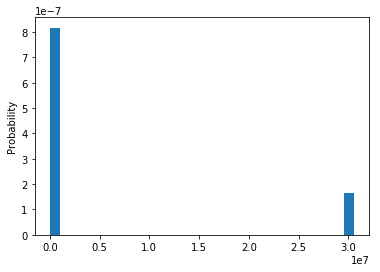

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = [30591090.347484276, 903.1713836477987, 361.97641509433964, 1362.3569182389938, 1242.3443396226414, 1909.9732704402516]
plt.hist(x, density=True, bins=30) # density
plt.ylabel('Probability');

In [ ]:
# the time_step is 3, the number of elements depends on the matrix.shape[1]
# define the lstm model for separate log key
def lstm_parameter_model(dataX, dataY):
    model = Sequential()
    model.add(LSTM(32, activation='relu', return_sequences=True, input_shape=(x.shape[1], x.shape[2])))

    model.add(LSTM(32, activation='relu', return_sequences=False))
    # output layer with a single value prediction (1,K)

    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(loss="mse", optimizer='adam', metrics=['accuracy'])
    print("the shape of x_train data is:", x.shape)
    print("the shape of y_train data is:", y.shape)
    # to ensure the training data patterns remain sequential --- disable the shuffle
    # make it stateful, we add batch_size
    model.fit(x, y, epochs=500, batch_size=batch_size, verbose=2, callbacks=[callbacks], shuffle=False)
    # to see the summary of input and output shape
    model.summary()
    print('the accuracy for single lstm model is:', model.evaluate(x, y, batch_size=batch_size, verbose=0))